## Carregamento

In [2]:
# Importações necessárias
import pandas as pd

# Função para carregar os dados
def carregar_dados(caminho_arquivo, coluna_data=None):
    """
    Carrega um arquivo CSV com dados.
    
    Parâmetros:
    - caminho_arquivo (str): Caminho do arquivo CSV.
    - coluna_data (str, opcional): Nome da coluna de datas para converter para datetime.
    
    Retorna:
    - pandas.DataFrame: DataFrame com os dados carregados.
    """
    # Carrega o CSV
    dados = pd.read_csv(caminho_arquivo)
    
    # Converte a coluna de datas para datetime com timezone, se especificada
    if coluna_data:
        dados[coluna_data] = pd.to_datetime(dados[coluna_data], utc=True)
    
    return dados

# Exemplo de uso da função com coluna de datas 'date'
caminho_arquivo = '../data/processed/sales_data_atualizado.csv'
dados = carregar_dados(caminho_arquivo, coluna_data='Sale_Date')

# Exibir as primeiras linhas do DataFrame
dados.head(10)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03 00:00:00+00:00,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21 00:00:00+00:00,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21 00:00:00+00:00,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24 00:00:00+00:00,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24 00:00:00+00:00,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
5,1021,2023-02-11 00:00:00+00:00,Charlie,West,3761.15,32,Food,900.79,1106.51,New,0.21,Cash,Online,West-Charlie
6,1083,2023-04-11 00:00:00+00:00,Bob,West,618.31,29,Furniture,2408.81,2624.09,Returning,0.14,Cash,Online,West-Bob
7,1087,2023-01-06 00:00:00+00:00,Eve,South,7698.92,46,Furniture,3702.51,3964.65,New,0.12,Bank Transfer,Online,South-Eve
8,1075,2023-06-29 00:00:00+00:00,David,South,4223.39,30,Furniture,738.06,1095.45,New,0.05,Bank Transfer,Online,South-David
9,1075,2023-10-09 00:00:00+00:00,Charlie,West,8239.58,18,Clothing,2228.35,2682.34,New,0.13,Bank Transfer,Online,West-Charlie


## Colunas/descrições

In [3]:
# Dicionário com a descrição de cada coluna
colunas_descricao = {
    'Product_ID': 'Identificação única do produto',
    'Sale_Date': 'Data da venda do produto',
    'Sales_Rep': 'Representante de vendas responsável pela transação',
    'Region': 'Região onde a venda foi realizada',
    'Sales_Amount': 'Valor total da venda',
    'Quantity_Sold': 'Quantidade de itens vendidos',
    'Product_Category': 'Categoria do produto vendido',
    'Unit_Cost': 'Custo unitário do produto',
    'Unit_Price': 'Preço unitário do produto',
    'Customer_Type': 'Tipo de cliente (Novo ou Retornando)',
    'Discount': 'Desconto aplicado na venda',
    'Payment_Method': 'Método de pagamento utilizado',
    'Sales_Channel': 'Canal de vendas (Online ou Varejo)',
    'Region_and_Sales_Rep': 'Combinação da região e do representante de vendas'
}

# Gerar o relatório amigável
relatorio = "\n".join([f"{coluna}: {descricao}" for coluna, descricao in colunas_descricao.items()])
print(relatorio)

Product_ID: Identificação única do produto
Sale_Date: Data da venda do produto
Sales_Rep: Representante de vendas responsável pela transação
Region: Região onde a venda foi realizada
Sales_Amount: Valor total da venda
Quantity_Sold: Quantidade de itens vendidos
Product_Category: Categoria do produto vendido
Unit_Cost: Custo unitário do produto
Unit_Price: Preço unitário do produto
Customer_Type: Tipo de cliente (Novo ou Retornando)
Discount: Desconto aplicado na venda
Payment_Method: Método de pagamento utilizado
Sales_Channel: Canal de vendas (Online ou Varejo)
Region_and_Sales_Rep: Combinação da região e do representante de vendas


## Vendas por Região

### Quais regiões têm os maiores e menores volumes de vendas?

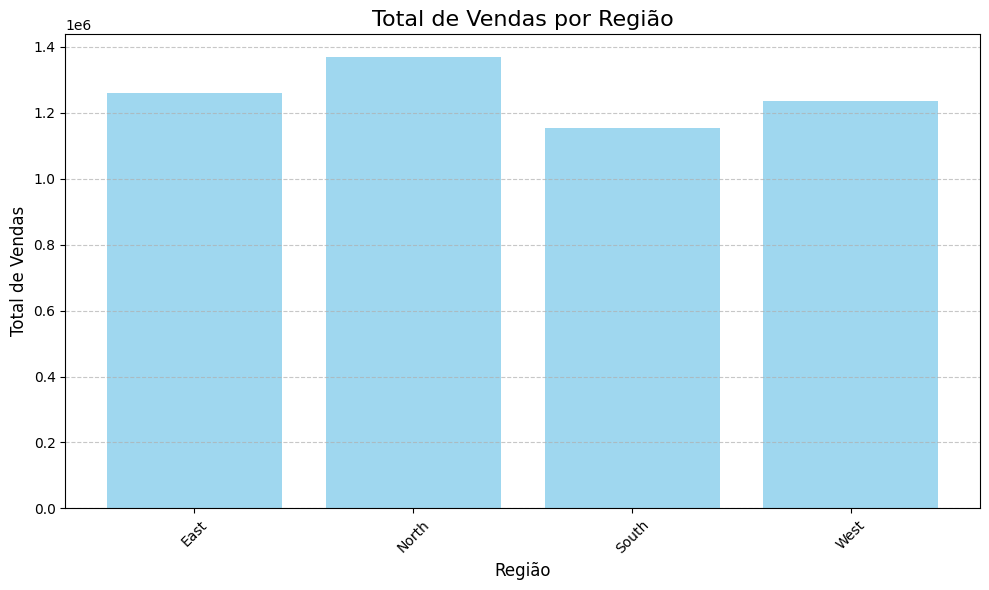

### Resumo da Análise ###
A região com o maior volume de vendas é 'North', com um total de vendas de 1369612.51 e uma média de vendas de 5129.63.
A região com o menor volume de vendas é 'South', com um total de vendas de 1154250.86 e uma média de vendas de 5107.30.

### Estatísticas Detalhadas por Região ###
Região: East | Total de Vendas: 1259792.93 | Média de Vendas: 4790.09
Região: North | Total de Vendas: 1369612.51 | Média de Vendas: 5129.63
Região: South | Total de Vendas: 1154250.86 | Média de Vendas: 5107.30
Região: West | Total de Vendas: 1235608.93 | Média de Vendas: 5063.97


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

def analisar_vendas_por_regiao(dados, coluna_regiao='Region', coluna_vendas='Sales_Amount'):
    """
    Analisa a relação entre uma coluna de região e uma coluna de vendas em um DataFrame.
    
    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_regiao (str): Nome da coluna que representa as regiões.
    - coluna_vendas (str): Nome da coluna que representa os valores de vendas.
    
    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    if coluna_regiao not in dados.columns or coluna_vendas not in dados.columns:
        raise ValueError(f"As colunas '{coluna_regiao}' e/ou '{coluna_vendas}' não estão presentes no DataFrame.")
    
    # Agrupamento por região e cálculo de estatísticas
    vendas_por_regiao = dados.groupby(coluna_regiao)[coluna_vendas].agg(['sum', 'mean']).reset_index()
    vendas_por_regiao.rename(columns={'sum': 'Total_Vendas', 'mean': 'Media_Vendas'}, inplace=True)
    
    # Identificar regiões com maior e menor volume de vendas
    regiao_maior_venda = vendas_por_regiao.loc[vendas_por_regiao['Total_Vendas'].idxmax()]
    regiao_menor_venda = vendas_por_regiao.loc[vendas_por_regiao['Total_Vendas'].idxmin()]
    
    # Visualização dos dados
    plt.figure(figsize=(10, 6))
    plt.bar(vendas_por_regiao[coluna_regiao], vendas_por_regiao['Total_Vendas'], color='skyblue', alpha=0.8)
    plt.title('Total de Vendas por Região', fontsize=16)
    plt.xlabel('Região', fontsize=12)
    plt.ylabel('Total de Vendas', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada das vendas por região.",
        "Região com Maior Volume de Vendas": {
            "Região": regiao_maior_venda[coluna_regiao],
            "Total de Vendas": regiao_maior_venda['Total_Vendas'],
            "Média de Vendas": regiao_maior_venda['Media_Vendas']
        },
        "Região com Menor Volume de Vendas": {
            "Região": regiao_menor_venda[coluna_regiao],
            "Total de Vendas": regiao_menor_venda['Total_Vendas'],
            "Média de Vendas": regiao_menor_venda['Media_Vendas']
        },
        "Estatísticas Gerais": vendas_por_regiao.to_dict(orient='records')
    }
    
    # Saída amigável
    print("### Resumo da Análise ###")
    print(f"A região com o maior volume de vendas é '{regiao_maior_venda[coluna_regiao]}', com um total de vendas de "
          f"{regiao_maior_venda['Total_Vendas']:.2f} e uma média de vendas de {regiao_maior_venda['Media_Vendas']:.2f}.")
    print(f"A região com o menor volume de vendas é '{regiao_menor_venda[coluna_regiao]}', com um total de vendas de "
          f"{regiao_menor_venda['Total_Vendas']:.2f} e uma média de vendas de {regiao_menor_venda['Media_Vendas']:.2f}.")
    print("\n### Estatísticas Detalhadas por Região ###")
    for regiao in insights["Estatísticas Gerais"]:
        print(f"Região: {regiao[coluna_regiao]} | Total de Vendas: {regiao['Total_Vendas']:.2f} | "
              f"Média de Vendas: {regiao['Media_Vendas']:.2f}")
    
    return insights

# Exemplo de uso da função
insights_vendas = analisar_vendas_por_regiao(dados)

## Desempenho dos Representantes de Vendas

### Quais representantes têm os maiores volumes de vendas?

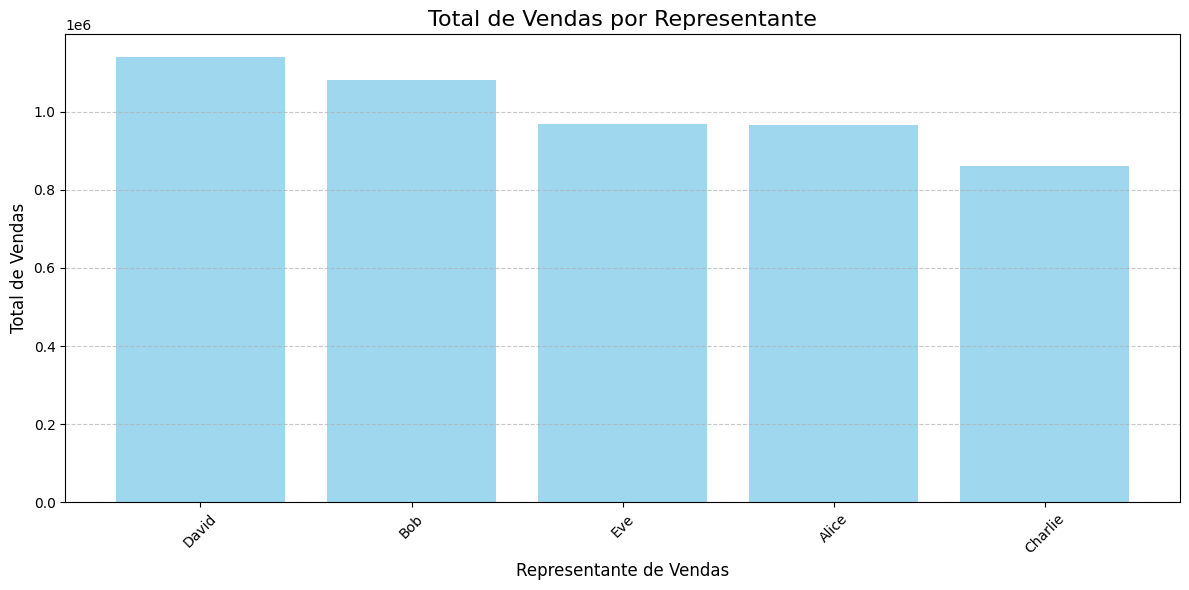

### Resumo da Análise ###
O melhor representante de vendas é 'David', com um total de vendas de 1141737.36, uma média de vendas de 5142.96 e 222 vendas realizadas.
O pior representante de vendas é 'Charlie', com um total de vendas de 860811.48, uma média de vendas de 5093.56 e 169 vendas realizadas.

### Ranking Completo ###
1. Representante: David | Total de Vendas: 1141737.36 | Média de Vendas: 5142.96 | Quantidade de Vendas: 222
2. Representante: Bob | Total de Vendas: 1080990.63 | Média de Vendas: 5197.07 | Quantidade de Vendas: 208
3. Representante: Eve | Total de Vendas: 970183.99 | Média de Vendas: 4642.03 | Quantidade de Vendas: 209
4. Representante: Alice | Total de Vendas: 965541.77 | Média de Vendas: 5028.86 | Quantidade de Vendas: 192
5. Representante: Charlie | Total de Vendas: 860811.48 | Média de Vendas: 5093.56 | Quantidade de Vendas: 169


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def analisar_desempenho_representantes(dados, coluna_representante='Sales_Rep', coluna_vendas='Sales_Amount'):
    """
    Analisa o desempenho dos representantes de vendas com base no valor total de vendas.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_representante (str): Nome da coluna que representa os representantes de vendas.
    - coluna_vendas (str): Nome da coluna que representa os valores de vendas.

    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    if coluna_representante not in dados.columns or coluna_vendas not in dados.columns:
        raise ValueError(f"As colunas '{coluna_representante}' e/ou '{coluna_vendas}' não estão presentes no DataFrame.")

    # Agrupamento por representante e cálculo de estatísticas
    vendas_por_representante = dados.groupby(coluna_representante)[coluna_vendas].agg(['sum', 'mean', 'count']).reset_index()
    vendas_por_representante.rename(columns={'sum': 'Total_Vendas', 'mean': 'Media_Vendas', 'count': 'Quantidade_Vendas'}, inplace=True)

    # Ordenar pelo total de vendas em ordem decrescente
    vendas_por_representante.sort_values(by='Total_Vendas', ascending=False, inplace=True)

    # Identificar o melhor e o pior representante
    melhor_representante = vendas_por_representante.iloc[0]
    pior_representante = vendas_por_representante.iloc[-1]

    # Visualização dos dados
    plt.figure(figsize=(12, 6))
    plt.bar(vendas_por_representante[coluna_representante], vendas_por_representante['Total_Vendas'], color='skyblue', alpha=0.8)
    plt.title('Total de Vendas por Representante', fontsize=16)
    plt.xlabel('Representante de Vendas', fontsize=12)
    plt.ylabel('Total de Vendas', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada do desempenho dos representantes de vendas.",
        "Melhor Representante": {
            "Nome": melhor_representante[coluna_representante],
            "Total de Vendas": melhor_representante['Total_Vendas'],
            "Média de Vendas": melhor_representante['Media_Vendas'],
            "Quantidade de Vendas": melhor_representante['Quantidade_Vendas']
        },
        "Pior Representante": {
            "Nome": pior_representante[coluna_representante],
            "Total de Vendas": pior_representante['Total_Vendas'],
            "Média de Vendas": pior_representante['Media_Vendas'],
            "Quantidade de Vendas": pior_representante['Quantidade_Vendas']
        },
        "Ranking Completo": vendas_por_representante.to_dict(orient='records')
    }

    # Saída amigável
    print("### Resumo da Análise ###")
    print(f"O melhor representante de vendas é '{melhor_representante[coluna_representante]}', com um total de vendas de "
          f"{melhor_representante['Total_Vendas']:.2f}, uma média de vendas de {melhor_representante['Media_Vendas']:.2f} "
          f"e {melhor_representante['Quantidade_Vendas']} vendas realizadas.")
    print(f"O pior representante de vendas é '{pior_representante[coluna_representante]}', com um total de vendas de "
          f"{pior_representante['Total_Vendas']:.2f}, uma média de vendas de {pior_representante['Media_Vendas']:.2f} "
          f"e {pior_representante['Quantidade_Vendas']} vendas realizadas.")
    print("\n### Ranking Completo ###")
    for idx, rep in enumerate(insights["Ranking Completo"], start=1):
        print(f"{idx}. Representante: {rep[coluna_representante]} | Total de Vendas: {rep['Total_Vendas']:.2f} | "
              f"Média de Vendas: {rep['Media_Vendas']:.2f} | Quantidade de Vendas: {rep['Quantidade_Vendas']}")

    return insights

# Exemplo de uso da função
insights_representantes = analisar_desempenho_representantes(dados)

## Impacto do Desconto nas Vendas

### Descontos maiores resultam em mais vendas?

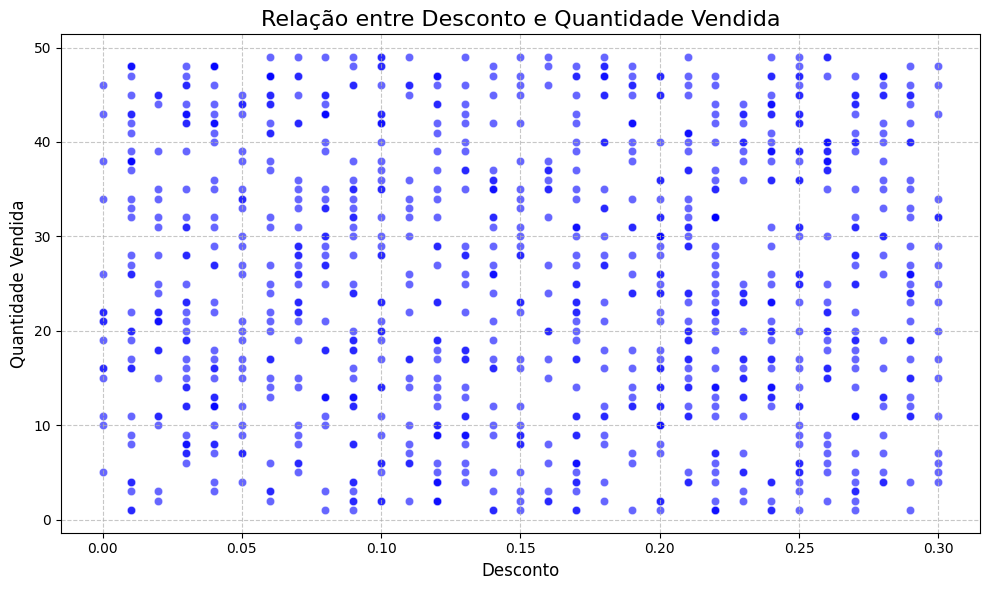

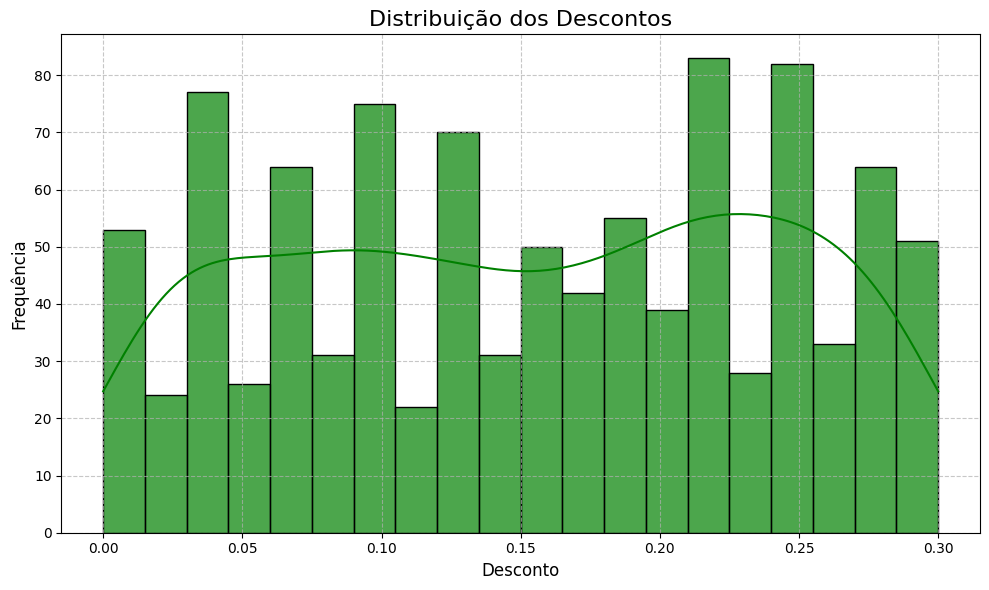

### Resumo da Análise ###
A análise foi realizada para entender a relação entre os descontos aplicados e a quantidade de itens vendidos.

### Estatísticas Descritivas ###
         Discount  Quantity_Sold
count  1000.00000    1000.000000
mean      0.15239      25.355000
std       0.08720      14.159006
min       0.00000       1.000000
25%       0.08000      13.000000
50%       0.15000      25.000000
75%       0.23000      38.000000
max       0.30000      49.000000

### Correlação ###
Coeficiente de Correlação de Pearson: -0.01
P-Valor: 0.8053

### Interpretação ###
A correlação entre desconto e quantidade vendida é -0.01. Isso indica uma relação fraca ou inexistente. O p-valor de 0.8053 indica que a correlação não é estatisticamente significativa.

### Recomendações ###
1. Avalie outros fatores que podem estar influenciando as vendas, como qualidade do produto, sazonalidade ou campanhas de marketing.
2. Reavalie a política de descontos, pois ela pode não estar gerando o impacto esperado

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

def analisar_impacto_desconto_vendas(dados, coluna_desconto='Discount', coluna_quantidade='Quantity_Sold'):
    """
    Analisa a relação entre desconto e quantidade vendida em um DataFrame.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_desconto (str): Nome da coluna que representa os descontos.
    - coluna_quantidade (str): Nome da coluna que representa a quantidade vendida.

    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    if coluna_desconto not in dados.columns or coluna_quantidade not in dados.columns:
        raise ValueError(f"As colunas '{coluna_desconto}' e/ou '{coluna_quantidade}' não estão presentes no DataFrame.")

    # Estatísticas descritivas
    estatisticas_descritivas = dados[[coluna_desconto, coluna_quantidade]].describe()

    # Cálculo da correlação
    correlacao, p_valor = pearsonr(dados[coluna_desconto], dados[coluna_quantidade])

    # Visualização da relação entre desconto e quantidade vendida
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=dados[coluna_desconto], y=dados[coluna_quantidade], alpha=0.6, color='blue')
    plt.title('Relação entre Desconto e Quantidade Vendida', fontsize=16)
    plt.xlabel('Desconto', fontsize=12)
    plt.ylabel('Quantidade Vendida', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Visualização da distribuição dos descontos
    plt.figure(figsize=(10, 6))
    sns.histplot(dados[coluna_desconto], kde=True, bins=20, color='green', alpha=0.7)
    plt.title('Distribuição dos Descontos', fontsize=16)
    plt.xlabel('Desconto', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada da relação entre desconto e quantidade vendida.",
        "Estatísticas Descritivas": estatisticas_descritivas.to_dict(),
        "Correlação": {
            "Coeficiente de Correlação de Pearson": correlacao,
            "P-Valor": p_valor
        },
        "Interpretação": (
            "A correlação entre desconto e quantidade vendida é {:.2f}. ".format(correlacao) +
            ("Isso indica uma relação positiva moderada." if correlacao > 0.3 else
             "Isso indica uma relação fraca ou inexistente.") +
            " O p-valor de {:.4f} ".format(p_valor) +
            ("sugere que a correlação é estatisticamente significativa." if p_valor < 0.05 else
             "indica que a correlação não é estatisticamente significativa.")
        )
    }

    # Saída amigável
    print("### Resumo da Análise ###")
    print("A análise foi realizada para entender a relação entre os descontos aplicados e a quantidade de itens vendidos.")
    print("\n### Estatísticas Descritivas ###")
    print(estatisticas_descritivas)
    print("\n### Correlação ###")
    print(f"Coeficiente de Correlação de Pearson: {correlacao:.2f}")
    print(f"P-Valor: {p_valor:.4f}")
    print("\n### Interpretação ###")
    print(insights["Interpretação"])
    print("\n### Recomendações ###")
    if correlacao > 0.3 and p_valor < 0.05:
        print("1. Considere aplicar descontos estratégicos para aumentar as vendas, especialmente em produtos com baixa demanda.")
        print("2. Realize testes A/B para identificar o nível ideal de desconto que maximize as vendas sem comprometer a margem de lucro.")
    else:
        print("1. Avalie outros fatores que podem estar influenciando as vendas, como qualidade do produto, sazonalidade ou campanhas de marketing.")
        print("2. Reavalie a política de descontos, pois ela pode não estar gerando o impacto esperado nas vendas.")

    return insights

# Exemplo de uso da função
insights_desconto = analisar_impacto_desconto_vendas(dados)

## Método de Pagamento Preferido

### Qual método de pagamento está associado a maiores valores de venda?

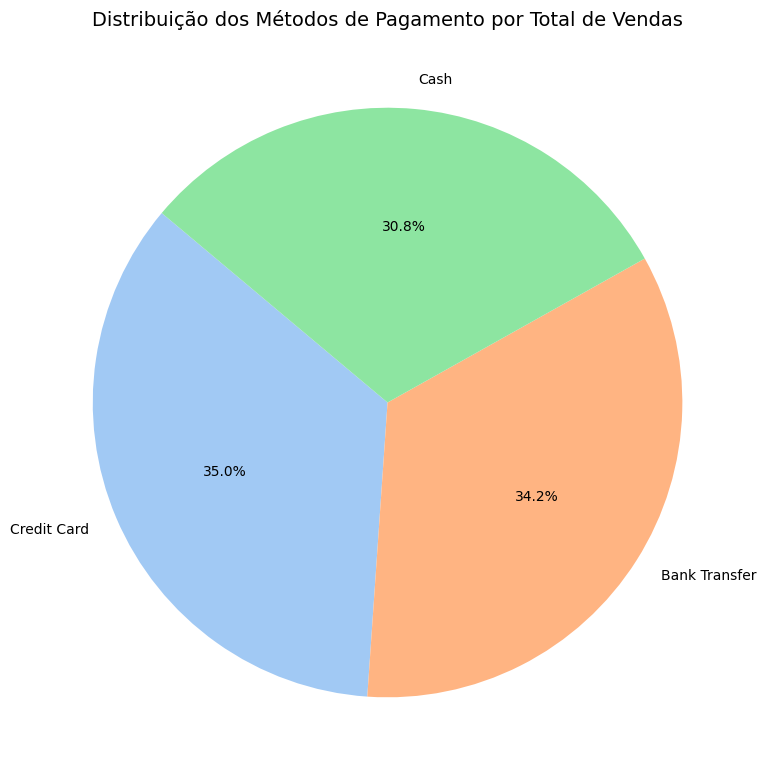

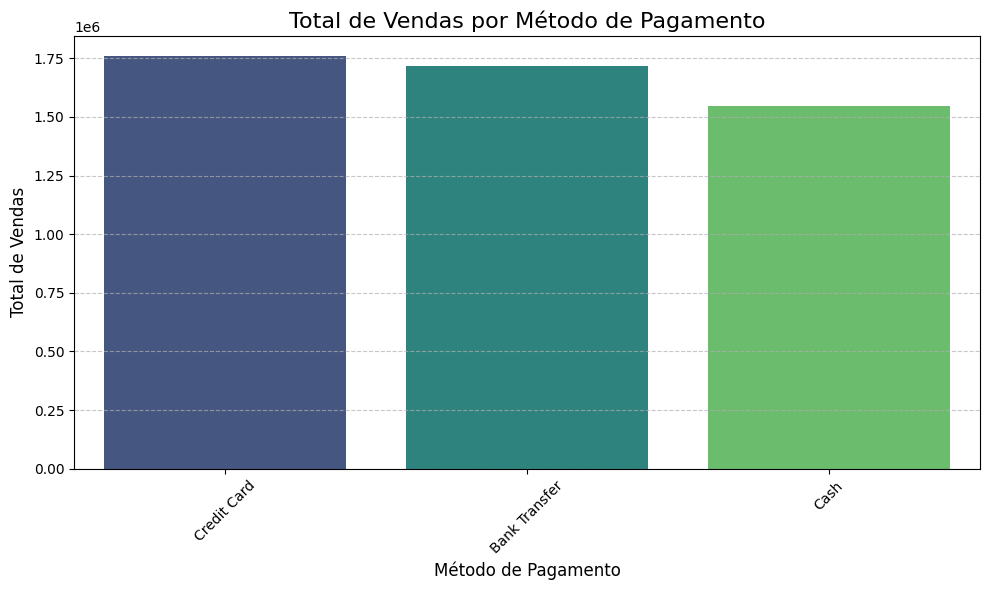

### Resumo da Análise ###
A análise foi realizada para entender a relação entre os métodos de pagamento utilizados e os valores de vendas.

### Método com Maior Volume de Vendas ###
O método de pagamento com o maior volume de vendas é 'Credit Card', com um total de vendas de 1757563.52, uma média de vendas de 5094.39 e 345 transações realizadas.

### Método com Menor Volume de Vendas ###
O método de pagamento com o menor volume de vendas é 'Cash', com um total de vendas de 1544338.54, uma média de vendas de 4933.99 e 313 transações realizadas.

### Recomendações ###
1. Considere promover o método de pagamento mais popular para aumentar ainda mais as vendas.
2. Avalie estratégias para incentivar o uso de métodos de pagamento menos utilizados, como descontos ou promoções específicas.
3. Monitore continuamente o desempenho dos métodos de pagamento para identificar tendências e ajustar as estratégias de vendas.


In [9]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

def analisar_metodo_pagamento(dados, coluna_pagamento='Payment_Method', coluna_vendas='Sales_Amount'):
    """
    Analisa a relação entre o método de pagamento e o valor total de vendas.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_pagamento (str): Nome da coluna que representa os métodos de pagamento.
    - coluna_vendas (str): Nome da coluna que representa os valores de vendas.

    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    if coluna_pagamento not in dados.columns or coluna_vendas not in dados.columns:
        raise ValueError(f"As colunas '{coluna_pagamento}' e/ou '{coluna_vendas}' não estão presentes no DataFrame.")

    # Agrupamento por método de pagamento e cálculo de estatísticas
    vendas_por_pagamento = dados.groupby(coluna_pagamento)[coluna_vendas].agg(['sum', 'mean', 'count']).reset_index()
    vendas_por_pagamento.rename(columns={'sum': 'Total_Vendas', 'mean': 'Media_Vendas', 'count': 'Quantidade_Transacoes'}, inplace=True)

    # Ordenar pelo total de vendas em ordem decrescente
    vendas_por_pagamento.sort_values(by='Total_Vendas', ascending=False, inplace=True)

    # Identificar o método de pagamento com maior e menor volume de vendas
    metodo_maior_venda = vendas_por_pagamento.iloc[0]
    metodo_menor_venda = vendas_por_pagamento.iloc[-1]

    # Visualização da distribuição dos métodos de pagamento (gráfico de pizza)
    plt.figure(figsize=(8, 8))
    plt.pie(vendas_por_pagamento['Total_Vendas'], labels=vendas_por_pagamento[coluna_pagamento], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Distribuição dos Métodos de Pagamento por Total de Vendas', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Visualização do total de vendas por método de pagamento (gráfico de barras)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coluna_pagamento, y='Total_Vendas', data=vendas_por_pagamento, hue=coluna_pagamento, palette="viridis", dodge=False, legend=False)
    plt.title('Total de Vendas por Método de Pagamento', fontsize=16)
    plt.xlabel('Método de Pagamento', fontsize=12)
    plt.ylabel('Total de Vendas', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada da relação entre métodos de pagamento e valores de vendas.",
        "Método com Maior Volume de Vendas": {
            "Método": metodo_maior_venda[coluna_pagamento],
            "Total de Vendas": metodo_maior_venda['Total_Vendas'],
            "Média de Vendas": metodo_maior_venda['Media_Vendas'],
            "Quantidade de Transações": metodo_maior_venda['Quantidade_Transacoes']
        },
        "Método com Menor Volume de Vendas": {
            "Método": metodo_menor_venda[coluna_pagamento],
            "Total de Vendas": metodo_menor_venda['Total_Vendas'],
            "Média de Vendas": metodo_menor_venda['Media_Vendas'],
            "Quantidade de Transações": metodo_menor_venda['Quantidade_Transacoes']
        },
        "Estatísticas Gerais": vendas_por_pagamento.to_dict(orient='records')
    }

    # Saída amigável
    print("### Resumo da Análise ###")
    print("A análise foi realizada para entender a relação entre os métodos de pagamento utilizados e os valores de vendas.")
    print("\n### Método com Maior Volume de Vendas ###")
    print(f"O método de pagamento com o maior volume de vendas é '{metodo_maior_venda[coluna_pagamento]}', com um total de vendas de "
          f"{metodo_maior_venda['Total_Vendas']:.2f}, uma média de vendas de {metodo_maior_venda['Media_Vendas']:.2f} "
          f"e {metodo_maior_venda['Quantidade_Transacoes']} transações realizadas.")
    print("\n### Método com Menor Volume de Vendas ###")
    print(f"O método de pagamento com o menor volume de vendas é '{metodo_menor_venda[coluna_pagamento]}', com um total de vendas de "
          f"{metodo_menor_venda['Total_Vendas']:.2f}, uma média de vendas de {metodo_menor_venda['Media_Vendas']:.2f} "
          f"e {metodo_menor_venda['Quantidade_Transacoes']} transações realizadas.")
    print("\n### Recomendações ###")
    print("1. Considere promover o método de pagamento mais popular para aumentar ainda mais as vendas.")
    print("2. Avalie estratégias para incentivar o uso de métodos de pagamento menos utilizados, como descontos ou promoções específicas.")
    print("3. Monitore continuamente o desempenho dos métodos de pagamento para identificar tendências e ajustar as estratégias de vendas.")

    return insights

# Exemplo de uso da função
insights_pagamento = analisar_metodo_pagamento(dados)

## Vendas por Categoria de Produto

### Quais categorias de produtos têm os maiores volumes de vendas?

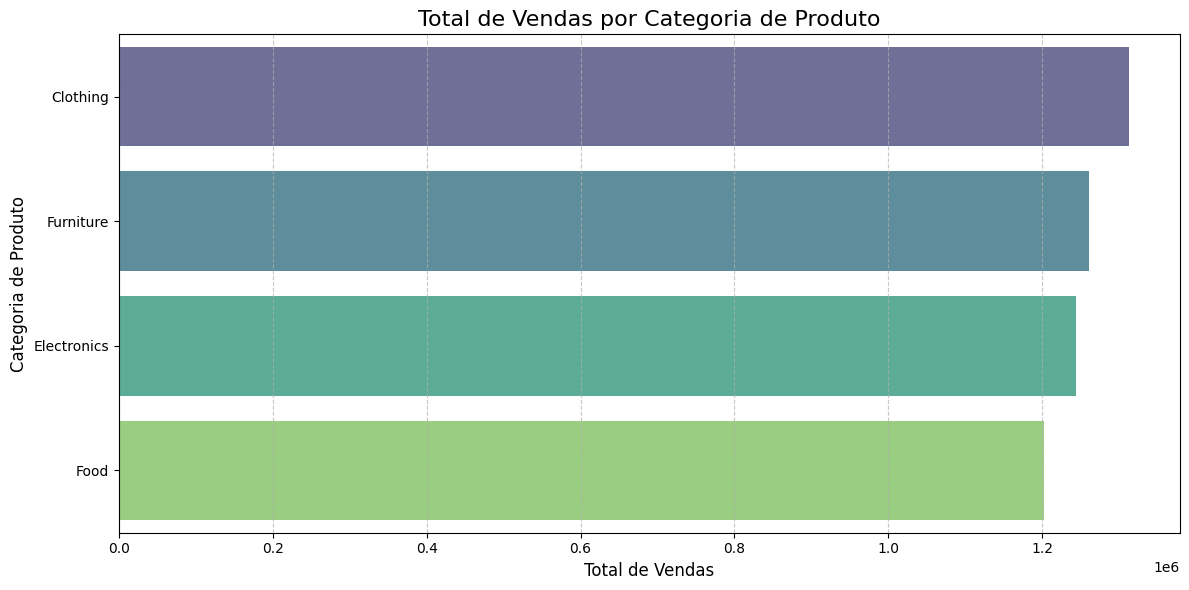

### Resumo da Análise ###
A análise foi realizada para entender a relação entre as categorias de produtos e os valores de vendas.

### Categoria com Maior Volume de Vendas ###
A categoria com o maior volume de vendas é 'Clothing', com um total de vendas de 1313474.36, uma média de vendas de 4901.02 e 268 vendas realizadas.

### Categoria com Menor Volume de Vendas ###
A categoria com o menor volume de vendas é 'Food', com um total de vendas de 1201773.54, uma média de vendas de 5317.58 e 226 vendas realizadas.

### Recomendações ###
1. Considere investir em campanhas de marketing para a categoria com maior volume de vendas, a fim de maximizar ainda mais os lucros.
2. Avalie estratégias para impulsionar as vendas da categoria com menor volume, como promoções, descontos ou melhorias no produto.
3. Monitore continuamente o desempenho das categorias para identificar tendências e ajustar as estratégias de vendas.


In [12]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

def analisar_vendas_por_categoria(dados, coluna_categoria='Product_Category', coluna_vendas='Sales_Amount'):
    """
    Analisa a relação entre categorias de produtos e o valor total de vendas.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_categoria (str): Nome da coluna que representa as categorias de produtos.
    - coluna_vendas (str): Nome da coluna que representa os valores de vendas.

    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    if coluna_categoria not in dados.columns or coluna_vendas not in dados.columns:
        raise ValueError(f"As colunas '{coluna_categoria}' e/ou '{coluna_vendas}' não estão presentes no DataFrame.")

    # Agrupamento por categoria e cálculo de estatísticas
    vendas_por_categoria = dados.groupby(coluna_categoria)[coluna_vendas].agg(['sum', 'mean', 'count']).reset_index()
    vendas_por_categoria.rename(columns={'sum': 'Total_Vendas', 'mean': 'Media_Vendas', 'count': 'Quantidade_Vendas'}, inplace=True)

    # Ordenar pelo total de vendas em ordem decrescente
    vendas_por_categoria.sort_values(by='Total_Vendas', ascending=False, inplace=True)

    # Identificar a categoria com maior e menor volume de vendas
    categoria_maior_venda = vendas_por_categoria.iloc[0]
    categoria_menor_venda = vendas_por_categoria.iloc[-1]

    # Visualização do total de vendas por categoria (gráfico de barras)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Total_Vendas', y=coluna_categoria, data=vendas_por_categoria, hue=coluna_categoria, palette="viridis", alpha=0.8, legend=False)
    plt.title('Total de Vendas por Categoria de Produto', fontsize=16)
    plt.xlabel('Total de Vendas', fontsize=12)
    plt.ylabel('Categoria de Produto', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada das vendas por categoria de produto.",
        "Categoria com Maior Volume de Vendas": {
            "Categoria": categoria_maior_venda[coluna_categoria],
            "Total de Vendas": categoria_maior_venda['Total_Vendas'],
            "Média de Vendas": categoria_maior_venda['Media_Vendas'],
            "Quantidade de Vendas": categoria_maior_venda['Quantidade_Vendas']
        },
        "Categoria com Menor Volume de Vendas": {
            "Categoria": categoria_menor_venda[coluna_categoria],
            "Total de Vendas": categoria_menor_venda['Total_Vendas'],
            "Média de Vendas": categoria_menor_venda['Media_Vendas'],
            "Quantidade de Vendas": categoria_menor_venda['Quantidade_Vendas']
        },
        "Estatísticas Gerais": vendas_por_categoria.to_dict(orient='records')
    }

    # Saída amigável
    print("### Resumo da Análise ###")
    print("A análise foi realizada para entender a relação entre as categorias de produtos e os valores de vendas.")
    print("\n### Categoria com Maior Volume de Vendas ###")
    print(f"A categoria com o maior volume de vendas é '{categoria_maior_venda[coluna_categoria]}', com um total de vendas de "
          f"{categoria_maior_venda['Total_Vendas']:.2f}, uma média de vendas de {categoria_maior_venda['Media_Vendas']:.2f} "
          f"e {categoria_maior_venda['Quantidade_Vendas']} vendas realizadas.")
    print("\n### Categoria com Menor Volume de Vendas ###")
    print(f"A categoria com o menor volume de vendas é '{categoria_menor_venda[coluna_categoria]}', com um total de vendas de "
          f"{categoria_menor_venda['Total_Vendas']:.2f}, uma média de vendas de {categoria_menor_venda['Media_Vendas']:.2f} "
          f"e {categoria_menor_venda['Quantidade_Vendas']} vendas realizadas.")
    print("\n### Recomendações ###")
    print("1. Considere investir em campanhas de marketing para a categoria com maior volume de vendas, a fim de maximizar ainda mais os lucros.")
    print("2. Avalie estratégias para impulsionar as vendas da categoria com menor volume, como promoções, descontos ou melhorias no produto.")
    print("3. Monitore continuamente o desempenho das categorias para identificar tendências e ajustar as estratégias de vendas.")

    return insights

# Exemplo de uso da função
insights_categoria = analisar_vendas_por_categoria(dados)

## Eficácia do Canal de Vendas

### Vendas online ou no varejo geram mais receita?

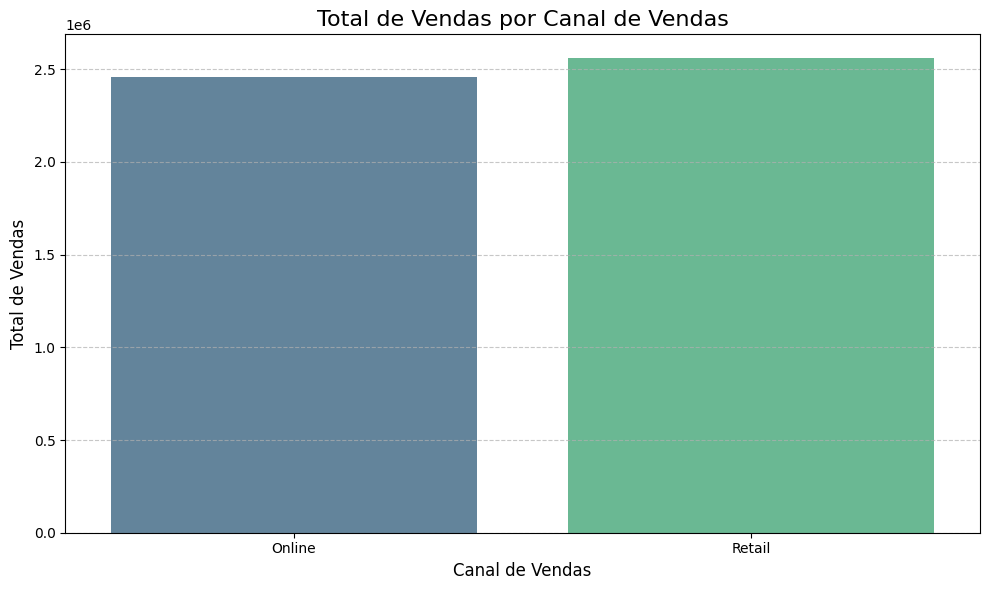

### Resumo da Análise ###
A análise foi realizada para entender a eficácia dos canais de vendas (Online e Varejo) em relação ao valor total de vendas.

### Canal com Maior Volume de Vendas ###
O canal de vendas com o maior volume de vendas é 'Retail', com um total de vendas de 2560431.30, uma média de vendas de 5000.84 e 512 transações realizadas.

### Canal com Menor Volume de Vendas ###
O canal de vendas com o menor volume de vendas é 'Online', com um total de vendas de 2458833.93, uma média de vendas de 5038.59 e 488 transações realizadas.

### Recomendações ###
1. Considere investir em campanhas de marketing para o canal com maior volume de vendas, a fim de maximizar ainda mais os lucros.
2. Avalie estratégias para impulsionar as vendas no canal com menor volume, como promoções, descontos ou melhorias na experiência do cliente.
3. Monitore continuamente o desempenho dos canais de vendas para identificar tendências e ajustar as estratégias de vendas.


In [14]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

def analisar_eficacia_canal_vendas(dados, coluna_canal='Sales_Channel', coluna_vendas='Sales_Amount'):
    """
    Analisa a eficácia dos canais de vendas (Online e Varejo) em relação ao valor total de vendas.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_canal (str): Nome da coluna que representa os canais de vendas.
    - coluna_vendas (str): Nome da coluna que representa os valores de vendas.

    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    if coluna_canal not in dados.columns or coluna_vendas not in dados.columns:
        raise ValueError(f"As colunas '{coluna_canal}' e/ou '{coluna_vendas}' não estão presentes no DataFrame.")

    # Agrupamento por canal de vendas e cálculo de estatísticas
    vendas_por_canal = dados.groupby(coluna_canal)[coluna_vendas].agg(['sum', 'mean', 'count']).reset_index()
    vendas_por_canal.rename(columns={'sum': 'Total_Vendas', 'mean': 'Media_Vendas', 'count': 'Quantidade_Vendas'}, inplace=True)

    # Identificar o canal com maior e menor volume de vendas
    canal_maior_venda = vendas_por_canal.iloc[vendas_por_canal['Total_Vendas'].idxmax()]
    canal_menor_venda = vendas_por_canal.iloc[vendas_por_canal['Total_Vendas'].idxmin()]

    # Visualização do total de vendas por canal (gráfico de barras)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coluna_canal, y='Total_Vendas', data=vendas_por_canal, hue=coluna_canal, palette="viridis", alpha=0.8, legend=False)
    plt.title('Total de Vendas por Canal de Vendas', fontsize=16)
    plt.xlabel('Canal de Vendas', fontsize=12)
    plt.ylabel('Total de Vendas', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada da eficácia dos canais de vendas.",
        "Canal com Maior Volume de Vendas": {
            "Canal": canal_maior_venda[coluna_canal],
            "Total de Vendas": canal_maior_venda['Total_Vendas'],
            "Média de Vendas": canal_maior_venda['Media_Vendas'],
            "Quantidade de Vendas": canal_maior_venda['Quantidade_Vendas']
        },
        "Canal com Menor Volume de Vendas": {
            "Canal": canal_menor_venda[coluna_canal],
            "Total de Vendas": canal_menor_venda['Total_Vendas'],
            "Média de Vendas": canal_menor_venda['Media_Vendas'],
            "Quantidade de Vendas": canal_menor_venda['Quantidade_Vendas']
        },
        "Estatísticas Gerais": vendas_por_canal.to_dict(orient='records')
    }

    # Saída amigável
    print("### Resumo da Análise ###")
    print("A análise foi realizada para entender a eficácia dos canais de vendas (Online e Varejo) em relação ao valor total de vendas.")
    print("\n### Canal com Maior Volume de Vendas ###")
    print(f"O canal de vendas com o maior volume de vendas é '{canal_maior_venda[coluna_canal]}', com um total de vendas de "
          f"{canal_maior_venda['Total_Vendas']:.2f}, uma média de vendas de {canal_maior_venda['Media_Vendas']:.2f} "
          f"e {canal_maior_venda['Quantidade_Vendas']} transações realizadas.")
    print("\n### Canal com Menor Volume de Vendas ###")
    print(f"O canal de vendas com o menor volume de vendas é '{canal_menor_venda[coluna_canal]}', com um total de vendas de "
          f"{canal_menor_venda['Total_Vendas']:.2f}, uma média de vendas de {canal_menor_venda['Media_Vendas']:.2f} "
          f"e {canal_menor_venda['Quantidade_Vendas']} transações realizadas.")
    print("\n### Recomendações ###")
    print("1. Considere investir em campanhas de marketing para o canal com maior volume de vendas, a fim de maximizar ainda mais os lucros.")
    print("2. Avalie estratégias para impulsionar as vendas no canal com menor volume, como promoções, descontos ou melhorias na experiência do cliente.")
    print("3. Monitore continuamente o desempenho dos canais de vendas para identificar tendências e ajustar as estratégias de vendas.")

    return insights

# Exemplo de uso da função
insights_canal = analisar_eficacia_canal_vendas(dados)

## Tipo de Cliente vs. Valor da Venda

### Clientes novos ou retornantes gastam mais?

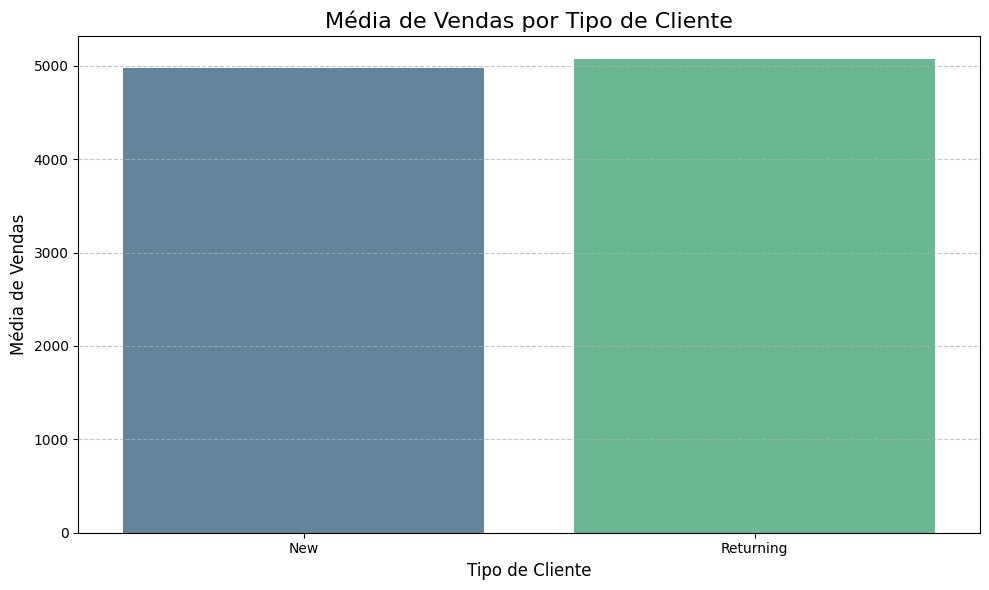

### Resumo da Análise ###
A análise foi realizada para entender a relação entre o tipo de cliente (Novo ou Retornando) e o valor total de vendas.

### Tipo de Cliente com Maior Média de Vendas ###
O tipo de cliente com a maior média de vendas é 'Returning', com uma média de vendas de 5066.55, um total de vendas de 2513006.93 e 496 vendas realizadas.

### Tipo de Cliente com Menor Média de Vendas ###
O tipo de cliente com a menor média de vendas é 'New', com uma média de vendas de 4972.73, um total de vendas de 2506258.30 e 504 vendas realizadas.

### Recomendações ###
1. Considere estratégias para fidelizar clientes novos, como programas de recompensas ou descontos exclusivos.
2. Avalie campanhas de marketing direcionadas para clientes retornantes, incentivando compras recorrentes.
3. Monitore continuamente o comportamento de compra de ambos os tipos de clientes para ajustar as estratégias de vendas.


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analisar_tipo_cliente_vendas(dados, coluna_cliente='Customer_Type', coluna_vendas='Sales_Amount'):
    """
    Analisa a relação entre o tipo de cliente (Novo ou Retornando) e o valor total de vendas.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_cliente (str): Nome da coluna que representa o tipo de cliente.
    - coluna_vendas (str): Nome da coluna que representa os valores de vendas.

    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    if coluna_cliente not in dados.columns or coluna_vendas not in dados.columns:
        raise ValueError(f"As colunas '{coluna_cliente}' e/ou '{coluna_vendas}' não estão presentes no DataFrame.")

    # Agrupamento por tipo de cliente e cálculo de estatísticas
    vendas_por_cliente = dados.groupby(coluna_cliente)[coluna_vendas].agg(['sum', 'mean', 'count']).reset_index()
    vendas_por_cliente.rename(columns={'sum': 'Total_Vendas', 'mean': 'Media_Vendas', 'count': 'Quantidade_Vendas'}, inplace=True)

    # Identificar o tipo de cliente com maior e menor média de vendas
    cliente_maior_media = vendas_por_cliente.iloc[vendas_por_cliente['Media_Vendas'].idxmax()]
    cliente_menor_media = vendas_por_cliente.iloc[vendas_por_cliente['Media_Vendas'].idxmin()]

    # Visualização do total de vendas por tipo de cliente (gráfico de barras)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coluna_cliente, y='Media_Vendas', data=vendas_por_cliente, hue=coluna_cliente, palette="viridis", alpha=0.8, legend=False)
    plt.title('Média de Vendas por Tipo de Cliente', fontsize=16)
    plt.xlabel('Tipo de Cliente', fontsize=12)
    plt.ylabel('Média de Vendas', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada da relação entre o tipo de cliente e o valor total de vendas.",
        "Tipo de Cliente com Maior Média de Vendas": {
            "Tipo de Cliente": cliente_maior_media[coluna_cliente],
            "Média de Vendas": cliente_maior_media['Media_Vendas'],
            "Total de Vendas": cliente_maior_media['Total_Vendas'],
            "Quantidade de Vendas": cliente_maior_media['Quantidade_Vendas']
        },
        "Tipo de Cliente com Menor Média de Vendas": {
            "Tipo de Cliente": cliente_menor_media[coluna_cliente],
            "Média de Vendas": cliente_menor_media['Media_Vendas'],
            "Total de Vendas": cliente_menor_media['Total_Vendas'],
            "Quantidade de Vendas": cliente_menor_media['Quantidade_Vendas']
        },
        "Estatísticas Gerais": vendas_por_cliente.to_dict(orient='records')
    }

    # Saída amigável
    print("### Resumo da Análise ###")
    print("A análise foi realizada para entender a relação entre o tipo de cliente (Novo ou Retornando) e o valor total de vendas.")
    print("\n### Tipo de Cliente com Maior Média de Vendas ###")
    print(f"O tipo de cliente com a maior média de vendas é '{cliente_maior_media[coluna_cliente]}', com uma média de vendas de "
          f"{cliente_maior_media['Media_Vendas']:.2f}, um total de vendas de {cliente_maior_media['Total_Vendas']:.2f} "
          f"e {cliente_maior_media['Quantidade_Vendas']} vendas realizadas.")
    print("\n### Tipo de Cliente com Menor Média de Vendas ###")
    print(f"O tipo de cliente com a menor média de vendas é '{cliente_menor_media[coluna_cliente]}', com uma média de vendas de "
          f"{cliente_menor_media['Media_Vendas']:.2f}, um total de vendas de {cliente_menor_media['Total_Vendas']:.2f} "
          f"e {cliente_menor_media['Quantidade_Vendas']} vendas realizadas.")
    print("\n### Recomendações ###")
    print("1. Considere estratégias para fidelizar clientes novos, como programas de recompensas ou descontos exclusivos.")
    print("2. Avalie campanhas de marketing direcionadas para clientes retornantes, incentivando compras recorrentes.")
    print("3. Monitore continuamente o comportamento de compra de ambos os tipos de clientes para ajustar as estratégias de vendas.")

    return insights

# Exemplo de uso da função
insights_cliente = analisar_tipo_cliente_vendas(dados)

## Margem de Lucro por Produto

### Quais produtos têm as maiores e menores margens de lucro?

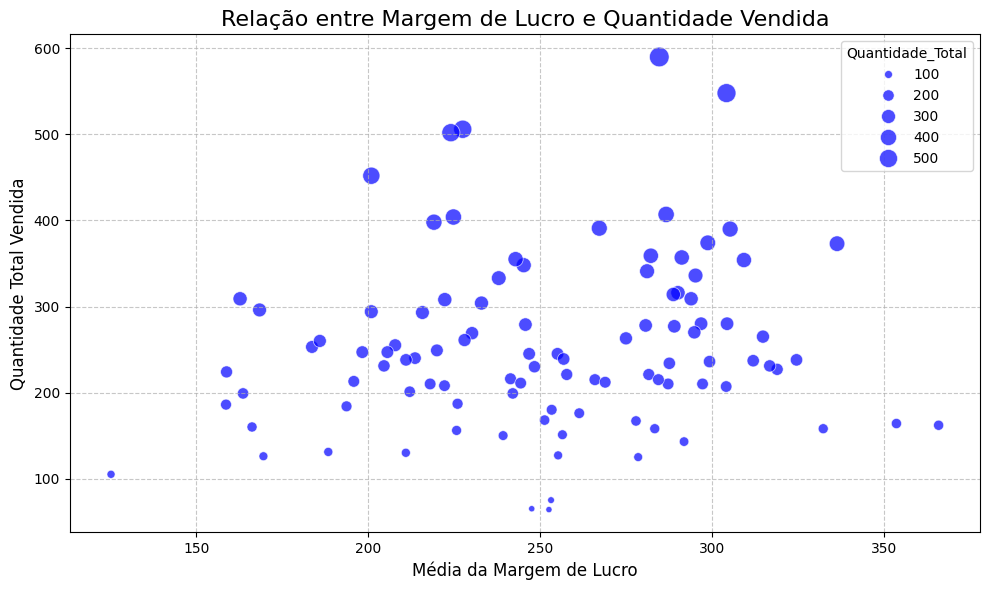

### Resumo da Análise ###
A análise foi realizada para entender a margem de lucro por produto e identificar oportunidades de melhoria.

### Produto com Maior Margem de Lucro ###
O produto com a maior margem de lucro é o '1071.0', com uma média de margem de lucro de 365.91 e uma quantidade total vendida de 162.0.

### Produto com Menor Margem de Lucro ###
O produto com a menor margem de lucro é o '1065.0', com uma média de margem de lucro de 125.19 e uma quantidade total vendida de 105.0.

### Recomendações ###
1. Avalie os produtos com menor margem de lucro para identificar possíveis ajustes nos preços ou custos.
2. Considere estratégias para aumentar as vendas dos produtos com maior margem de lucro, como campanhas de marketing direcionadas.
3. Monitore continuamente a margem de lucro por produto para identificar tendências e ajustar as estratégias de precificação.


In [19]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

def analisar_margem_lucro(dados, coluna_produto='Product_ID', coluna_preco='Unit_Price', coluna_custo='Unit_Cost', coluna_quantidade='Quantity_Sold'):
    """
    Analisa a margem de lucro por produto e identifica os produtos com maiores e menores margens de lucro.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_produto (str): Nome da coluna que representa os IDs dos produtos.
    - coluna_preco (str): Nome da coluna que representa o preço unitário dos produtos.
    - coluna_custo (str): Nome da coluna que representa o custo unitário dos produtos.
    - coluna_quantidade (str): Nome da coluna que representa a quantidade vendida.

    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    colunas_necessarias = [coluna_produto, coluna_preco, coluna_custo, coluna_quantidade]
    for coluna in colunas_necessarias:
        if coluna not in dados.columns:
            raise ValueError(f"A coluna '{coluna}' não está presente no DataFrame.")

    # Cálculo da margem de lucro
    dados['Margem_Lucro'] = dados[coluna_preco] - dados[coluna_custo]

    # Agrupamento por produto e cálculo de estatísticas
    lucro_por_produto = dados.groupby(coluna_produto).agg(
        Total_Margem_Lucro=('Margem_Lucro', 'sum'),
        Media_Margem_Lucro=('Margem_Lucro', 'mean'),
        Quantidade_Total=('Quantity_Sold', 'sum')
    ).reset_index()

    # Identificar os produtos com maior e menor margem de lucro
    produto_maior_lucro = lucro_por_produto.loc[lucro_por_produto['Media_Margem_Lucro'].idxmax()]
    produto_menor_lucro = lucro_por_produto.loc[lucro_por_produto['Media_Margem_Lucro'].idxmin()]

    # Visualização: Gráfico de dispersão (Margem de Lucro x Quantidade Vendida)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=lucro_por_produto['Media_Margem_Lucro'],
        y=lucro_por_produto['Quantidade_Total'],
        size=lucro_por_produto['Quantidade_Total'],
        sizes=(20, 200),
        alpha=0.7,
        color='blue'
    )
    plt.title('Relação entre Margem de Lucro e Quantidade Vendida', fontsize=16)
    plt.xlabel('Média da Margem de Lucro', fontsize=12)
    plt.ylabel('Quantidade Total Vendida', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada da margem de lucro por produto.",
        "Produto com Maior Margem de Lucro": {
            "Product_ID": produto_maior_lucro[coluna_produto],
            "Média da Margem de Lucro": produto_maior_lucro['Media_Margem_Lucro'],
            "Quantidade Total Vendida": produto_maior_lucro['Quantidade_Total']
        },
        "Produto com Menor Margem de Lucro": {
            "Product_ID": produto_menor_lucro[coluna_produto],
            "Média da Margem de Lucro": produto_menor_lucro['Media_Margem_Lucro'],
            "Quantidade Total Vendida": produto_menor_lucro['Quantidade_Total']
        },
        "Estatísticas Gerais": lucro_por_produto.to_dict(orient='records')
    }

    # Saída amigável
    print("### Resumo da Análise ###")
    print("A análise foi realizada para entender a margem de lucro por produto e identificar oportunidades de melhoria.")
    print("\n### Produto com Maior Margem de Lucro ###")
    print(f"O produto com a maior margem de lucro é o '{produto_maior_lucro[coluna_produto]}', com uma média de margem de lucro de "
          f"{produto_maior_lucro['Media_Margem_Lucro']:.2f} e uma quantidade total vendida de {produto_maior_lucro['Quantidade_Total']}.")
    print("\n### Produto com Menor Margem de Lucro ###")
    print(f"O produto com a menor margem de lucro é o '{produto_menor_lucro[coluna_produto]}', com uma média de margem de lucro de "
          f"{produto_menor_lucro['Media_Margem_Lucro']:.2f} e uma quantidade total vendida de {produto_menor_lucro['Quantidade_Total']}.")
    print("\n### Recomendações ###")
    print("1. Avalie os produtos com menor margem de lucro para identificar possíveis ajustes nos preços ou custos.")
    print("2. Considere estratégias para aumentar as vendas dos produtos com maior margem de lucro, como campanhas de marketing direcionadas.")
    print("3. Monitore continuamente a margem de lucro por produto para identificar tendências e ajustar as estratégias de precificação.")

    return insights

# Exemplo de uso da função
insights_lucro = analisar_margem_lucro(dados)

## Vendas ao Longo do Tempo

### Há padrões sazonais ou tendências de crescimento/declínio?

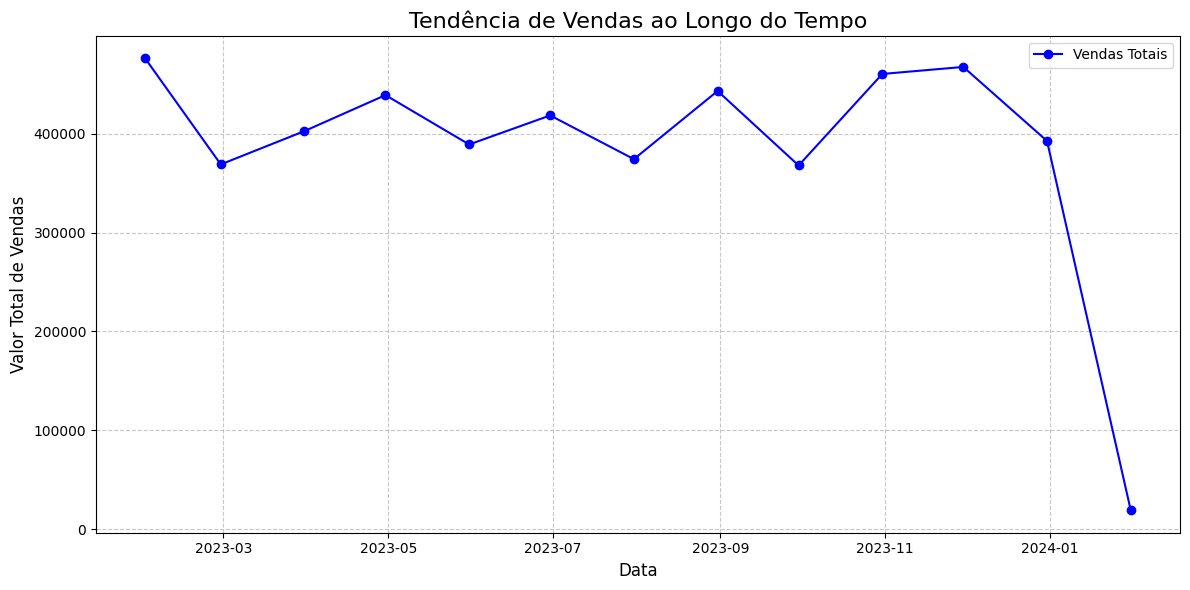

Decomposição sazonal não realizada devido a dados insuficientes.
### Resumo da Análise ###
A análise foi realizada para entender a tendência de vendas ao longo do tempo, identificando padrões sazonais e tendências.

### Tendência Geral ###
A tendência geral das vendas é decrescente.

### Estatísticas de Sazonalidade ###
None

### Recomendações ###
- Avalie fatores que podem estar contribuindo para o declínio das vendas e implemente ações corretivas.
- Considere ajustar estratégias de vendas com base nos padrões sazonais identificados.


In [27]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

def analisar_vendas_ao_longo_tempo(dados, coluna_data='Sale_Date', coluna_vendas='Sales_Amount', freq='ME'):
    """
    Analisa a tendência de vendas ao longo do tempo, identificando padrões sazonais e tendências de crescimento ou declínio.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_data (str): Nome da coluna que representa as datas das vendas.
    - coluna_vendas (str): Nome da coluna que representa os valores de vendas.
    - freq (str): Frequência para agregação dos dados (ex.: 'ME' para final do mês, 'W' para semanal).

    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    if coluna_data not in dados.columns or coluna_vendas not in dados.columns:
        raise ValueError(f"As colunas '{coluna_data}' e/ou '{coluna_vendas}' não estão presentes no DataFrame.")

    # Conversão da coluna de datas para datetime, se necessário
    if not pd.api.types.is_datetime64_any_dtype(dados[coluna_data]):
        dados[coluna_data] = pd.to_datetime(dados[coluna_data], utc=True)

    # Agregação dos dados por frequência especificada
    vendas_agrupadas = dados.groupby(pd.Grouper(key=coluna_data, freq=freq))[coluna_vendas].sum().reset_index()

    # Verificar se há observações suficientes para a decomposição sazonal
    decomposicao = None
    if len(vendas_agrupadas) >= 24:
        # Decomposição sazonal para identificar tendência e sazonalidade
        decomposicao = seasonal_decompose(vendas_agrupadas.set_index(coluna_data)[coluna_vendas], model='additive', period=12)

    # Visualização: Gráfico de linhas para vendas ao longo do tempo
    plt.figure(figsize=(12, 6))
    plt.plot(vendas_agrupadas[coluna_data], vendas_agrupadas[coluna_vendas], marker='o', color='blue', label='Vendas Totais')
    plt.title('Tendência de Vendas ao Longo do Tempo', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Valor Total de Vendas', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Visualização: Decomposição sazonal
    if decomposicao:
        decomposicao.plot()
        plt.tight_layout()
        plt.show()

        # Identificação de tendências
        tendencia_crescimento = decomposicao.trend.dropna().iloc[-1] > decomposicao.trend.dropna().iloc[0]
        sazonalidade = decomposicao.seasonal.describe()
    else:
        print("Decomposição sazonal não realizada devido a dados insuficientes.")
        tendencia_crescimento = None
        sazonalidade = None

    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada das vendas ao longo do tempo, identificando tendências e padrões sazonais.",
        "Tendência Geral": "Crescente" if tendencia_crescimento else "Decrescente",
        "Estatísticas de Sazonalidade": sazonalidade.to_dict() if sazonalidade is not None else None,
        "Recomendações": []
    }

    # Recomendações com base nos resultados
    if tendencia_crescimento:
        insights["Recomendações"].append("Invista em campanhas de marketing para aproveitar o crescimento das vendas.")
    else:
        insights["Recomendações"].append("Avalie fatores que podem estar contribuindo para o declínio das vendas e implemente ações corretivas.")
    insights["Recomendações"].append("Considere ajustar estratégias de vendas com base nos padrões sazonais identificados.")

    # Saída amigável
    print("### Resumo da Análise ###")
    print("A análise foi realizada para entender a tendência de vendas ao longo do tempo, identificando padrões sazonais e tendências.")
    print("\n### Tendência Geral ###")
    print(f"A tendência geral das vendas é {'crescente' if tendencia_crescimento else 'decrescente'}.")
    print("\n### Estatísticas de Sazonalidade ###")
    print(sazonalidade)
    print("\n### Recomendações ###")
    for recomendacao in insights["Recomendações"]:
        print(f"- {recomendacao}")

    return insights

# Chamada da função e exibição dos resultados
insights_vendas_tempo = analisar_vendas_ao_longo_tempo(dados)


## Representantes por Região

### Quais combinações de região e representante têm os melhores desempenhos?

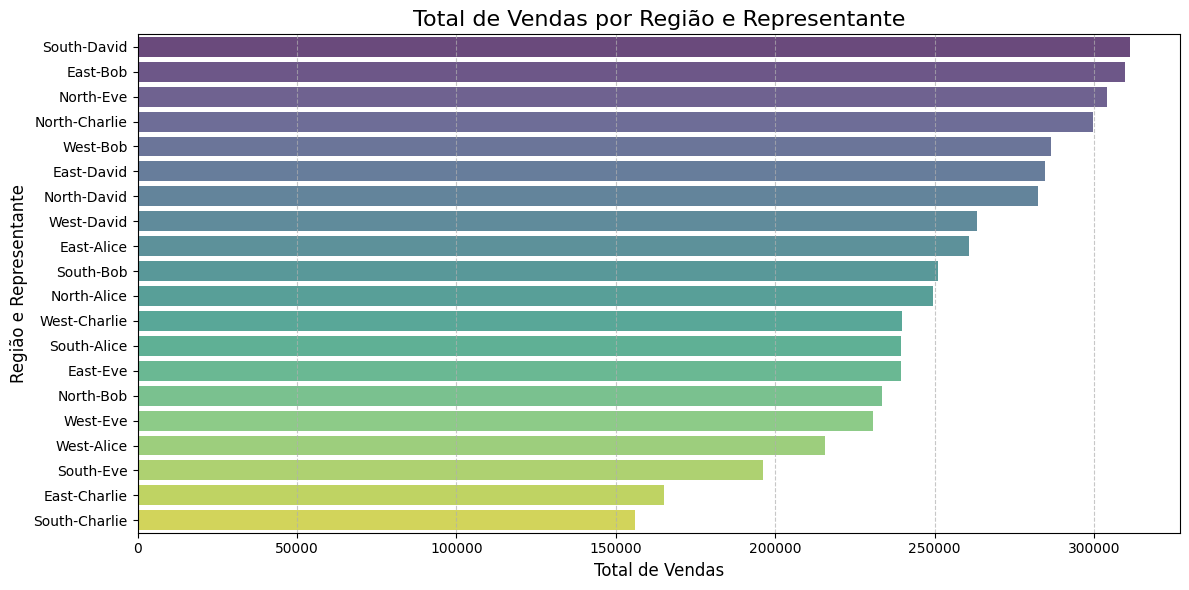

### Resumo da Análise ###
A análise foi realizada para entender a relação entre as combinações de região e representante e os valores de vendas.

### Melhor Combinação ###
A melhor combinação de região e representante é 'South-David', com um total de vendas de 311416.99, uma média de vendas de 5561.02 e 56 vendas realizadas.

### Pior Combinação ###
A pior combinação de região e representante é 'South-Charlie', com um total de vendas de 156140.68, uma média de vendas de 4879.40 e 32 vendas realizadas.

### Tabela Pivot ###
A tabela a seguir mostra o total de vendas por região e representante:
Sales_Rep      Alice        Bob    Charlie      David        Eve
Region                                                          
East       260789.47  309876.11  165172.94  284613.51  239340.90
North      249647.22  233464.81  299789.01  282539.27  304172.20
South      239414.54  251200.43  156140.68  311416.99  196078.22
West       215690.54  286449.28  239708.85  263167.59  230592.67

### Recom

In [29]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

def analisar_representantes_por_regiao(dados, coluna_combinacao='Region_and_Sales_Rep', coluna_vendas='Sales_Amount'):
    """
    Analisa a relação entre combinações de região e representante e o valor total de vendas.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados a serem analisados.
    - coluna_combinacao (str): Nome da coluna que representa a combinação de região e representante.
    - coluna_vendas (str): Nome da coluna que representa os valores de vendas.

    Retorna:
    - dict: Dicionário contendo insights e estatísticas calculadas.
    """
    # Validação de entradas
    if coluna_combinacao not in dados.columns or coluna_vendas not in dados.columns:
        raise ValueError(f"As colunas '{coluna_combinacao}' e/ou '{coluna_vendas}' não estão presentes no DataFrame.")

    # Agrupamento por combinação de região e representante e cálculo de estatísticas
    vendas_por_combinacao = dados.groupby(coluna_combinacao)[coluna_vendas].agg(['sum', 'mean', 'count']).reset_index()
    vendas_por_combinacao.rename(columns={'sum': 'Total_Vendas', 'mean': 'Media_Vendas', 'count': 'Quantidade_Vendas'}, inplace=True)

    # Ordenar pelo total de vendas em ordem decrescente
    vendas_por_combinacao.sort_values(by='Total_Vendas', ascending=False, inplace=True)

    # Identificar a combinação com maior e menor volume de vendas
    melhor_combinacao = vendas_por_combinacao.iloc[0]
    pior_combinacao = vendas_por_combinacao.iloc[-1]

    # Visualização: Tabela pivot com total de vendas por região e representante
    tabela_pivot = dados.pivot_table(values=coluna_vendas, index='Region', columns='Sales_Rep', aggfunc='sum', fill_value=0)

    # Visualização: Gráfico de barras para as combinações de região e representante
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Total_Vendas', y=coluna_combinacao, data=vendas_por_combinacao, hue=coluna_combinacao, palette="viridis", alpha=0.8, dodge=False, legend=False)
    plt.title('Total de Vendas por Região e Representante', fontsize=16)
    plt.xlabel('Total de Vendas', fontsize=12)
    plt.ylabel('Região e Representante', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Construção de insights
    insights = {
        "Resumo": "Análise detalhada da relação entre região e representante e o valor total de vendas.",
        "Melhor Combinação": {
            "Região e Representante": melhor_combinacao[coluna_combinacao],
            "Total de Vendas": melhor_combinacao['Total_Vendas'],
            "Média de Vendas": melhor_combinacao['Media_Vendas'],
            "Quantidade de Vendas": melhor_combinacao['Quantidade_Vendas']
        },
        "Pior Combinação": {
            "Região e Representante": pior_combinacao[coluna_combinacao],
            "Total de Vendas": pior_combinacao['Total_Vendas'],
            "Média de Vendas": pior_combinacao['Media_Vendas'],
            "Quantidade de Vendas": pior_combinacao['Quantidade_Vendas']
        },
        "Tabela Pivot": tabela_pivot,
        "Estatísticas Gerais": vendas_por_combinacao.to_dict(orient='records')
    }

    # Saída amigável
    print("### Resumo da Análise ###")
    print("A análise foi realizada para entender a relação entre as combinações de região e representante e os valores de vendas.")
    print("\n### Melhor Combinação ###")
    print(f"A melhor combinação de região e representante é '{melhor_combinacao[coluna_combinacao]}', com um total de vendas de "
          f"{melhor_combinacao['Total_Vendas']:.2f}, uma média de vendas de {melhor_combinacao['Media_Vendas']:.2f} "
          f"e {melhor_combinacao['Quantidade_Vendas']} vendas realizadas.")
    print("\n### Pior Combinação ###")
    print(f"A pior combinação de região e representante é '{pior_combinacao[coluna_combinacao]}', com um total de vendas de "
          f"{pior_combinacao['Total_Vendas']:.2f}, uma média de vendas de {pior_combinacao['Media_Vendas']:.2f} "
          f"e {pior_combinacao['Quantidade_Vendas']} vendas realizadas.")
    print("\n### Tabela Pivot ###")
    print("A tabela a seguir mostra o total de vendas por região e representante:")
    print(tabela_pivot)
    print("\n### Recomendações ###")
    print("1. Considere premiar os representantes das combinações com melhor desempenho para incentivar a continuidade dos bons resultados.")
    print("2. Avalie as combinações com pior desempenho para identificar possíveis problemas, como falta de treinamento ou baixa demanda na região.")
    print("3. Realize campanhas de marketing específicas para as regiões com menor volume de vendas, buscando aumentar a visibilidade e atratividade.")
    print("4. Monitore continuamente o desempenho por região e representante para ajustar as estratégias de vendas conforme necessário.")

    return insights

# Exemplo de uso da função
insights_representantes_regiao = analisar_representantes_por_regiao(dados)